In [1]:
import requests
from bs4 import BeautifulSoup as bs
import csv
import pandas as pd
import numpy as np

In [2]:
headers = {
    'accept':'*/*',
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.100 Safari/537.36'
}
base_url = 'https://krisha.kz/arenda/kvartiry/almaty/?das[rent.period]=2'

def hh_parse(base_url, headers):
    jobs = []
    session = requests.Session()
    request = session.get(base_url, headers = headers)
    if request.status_code == 200:
        soup = bs(request.content, 'html.parser')
        divs = soup.find_all('div', attrs = {'class':'a-card__inc'})
        for div in divs:
            title = div.find('a', attrs = {'class':'a-card__title'}).text
            href = div.find('a', attrs = {'class':'a-card__title'})['href']
            address = div.find('div', attrs = {'class':'a-card__subtitle'}).text
            price = div.find('div', attrs = {'class':'a-card__price'}).text
            content = div.find('div', attrs = {'class':'a-card__text-preview'}).text
            owner = div.find('div', attrs = {'class':'a-card__owner user-title-not-pro'})
            if owner is None:
                specialist = 1
                owner = 0
            else:
                specialist = 0
                owner = 1
            jobs.append({
                'title': title,
                'href': href,
                'address': address,
                'price': price,
                'content': content,
                'specialist': specialist,
                'owner': owner
            })
            #print(specialist)
            #print(owner)
            #print(price)
            #print(len(jobs))
            #print(title+" "+address+" "+price+" "+str(specialist))
    else:
        print('ERROR')
 
hh_parse(base_url, headers)

In [3]:
headers = {
    'accept':'*/*',
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.100 Safari/537.36'
}
base_url = 'https://krisha.kz/arenda/kvartiry/almaty/?das[rent.period]=2&page=1'

def krisha_parse(base_url, headers):
    flats = []
    urls = []
    urls.append(base_url)
    session = requests.Session()
    request = session.get(base_url, headers = headers)
    if request.status_code == 200:
        soup = bs(request.content, 'lxml')
        try:
            pagination = soup.find_all('a', attrs = {'class':'paginator__btn'})
            count = int(pagination[-2].text)
            #print(count)
            for i in range(count-1):
                url = f'https://krisha.kz/arenda/kvartiry/almaty/?das[rent.period]=2&page={i+1}'
                if url not in urls:
                    urls.append(url)
                #print(url)
        except:
            pass
        
        for url in urls:
            request = session.get(url, headers = headers)
            soup = bs(request.content, 'lxml')
            divs = soup.find_all('div', attrs = {'class':'a-card__inc'})
            for div in divs:
                title = div.find('a', attrs = {'class':'a-card__title'}).text
                price = div.find('div', attrs = {'class':'a-card__price'}).text
                href = div.find('a', attrs = {'class':'a-card__title'})['href']
                address = div.find('div', attrs = {'class':'a-card__subtitle'}).text
                content = div.find('div', attrs = {'class':'a-card__text-preview'}).text
                owner = div.find('div', attrs = {'class':'a-card__owner user-title-not-pro'})
                if owner is None:
                    specialist = 1
                    owner = 0
                else:
                    specialist = 0
                    owner = 1
                flats.append({
                    'title': title,
                    'price': price,
                    'href': href,
                    'address': address,
                    'content': content,
                    'specialist': specialist,
                    'owner': owner
                }) 
        print(len(flats))
    else:
        print('ERROR')
    return flats
                
def files_writer(flats):
    #with open('HeadHunter.csv', 'a', encoding='utf-8') as file:
    with open(r"Krisha.csv", "w", encoding = 'utf-8') as file:
        a_pen = csv.writer(file)
        a_pen.writerow(('title', 'price', 'href', 'address', 'content','owner','specialist'))
        for flat in flats:
            a_pen.writerow((flat['title'],flat['price'],flat['href'],flat['address'],flat['content'],flat['owner'],flat['specialist']))

        
flats = krisha_parse(base_url, headers)
files_writer(flats)

4523


In [8]:
df=pd.read_csv('Krisha.csv')

In [9]:
df.head()

,title,price,href,address,content,owner,specialist
0,"2-комнатная квартира, 80 м², 14/21 эт. помесячно",\n ...,/a/show/27923071,"\n Медеуский р-н, А...","\n жил. комплекс AFD Plaza,...",0,1
1,"3-комнатная квартира, 75 м², 8/9 эт. помесячно",\n ...,/a/show/51918497,"\n Ауэзовский р-н, ...","\n панельный дом, 1993 г.п....",0,1
2,"1-комнатная квартира, 32 м², 1/5 эт. помесячно",\n ...,/a/show/52189775,"\n Алмалинский р-н,...","\n панельный дом, 1978 г.п....",0,1
3,"2-комнатная квартира, 61 м², 11/17 эт. помесячно",\n ...,/a/show/49988248,\n Бостандыкский р-...,"\n жил. комплекс Арай, моно...",1,0
4,"1-комнатная квартира, 45 м², 5/9 эт. помесячно",\n ...,/a/show/46870101,"\n Алмалинский р-н,...","\n панельный дом, 1985 г.п....",0,1


In [10]:
df.shape

(4523, 7)

In [11]:
new = df["title"].str.split(",", expand = True)
df["rooms"]= new[0]
df["square"]= new[1] 
#df["floor"]=new[2]
df.drop(columns =["title"], inplace = True)

new = df["address"].str.split(",", expand = True)
df["district"]= new[0]
df["street"]= new[1]
df.drop(columns =["address"], inplace = True)

new = df["district"].str.split(expand = True)
df["district"] = new[0]

new = df["square"].str.split(expand = True)
df["square"] = new[0]
df['square']=pd.to_numeric(df['square'])

df.drop(columns =["href"], inplace = True)

new = df["price"].str.split(expand = True)
new = new[0]+new[1]
df["price"] = new
df['price']=pd.to_numeric(df['price'])
df.loc[df.price <= 10000,'price'] = df.price * 1000

new = df['rooms'].str.split('-', expand = True)
df['rooms'] = new[0]

df.drop(columns =["street"], inplace = True)

#new = df['floor'].str.split('/', expand = True)
#df['floor'] = new[0]
#new = new.dropna()
#new = new[1].str.split(' ',expand = True)
#df['total floors'] = new[0]

df = df.dropna()

districts = ['Алмалинский','Бостандыкский','Ауэзовский','Медеуский','Жетысуский','Наурызбайский','Алатауский','Турксибский']
df = df[df['district'].isin(districts)]

year = list(df['content'])
yeardf=[]
for years in year:
    years = years[years.find("г.п.")-5:years.find("г.п.")-1]
    yeardf.append(years)
df['year'] = yeardf

df.drop(columns = ["content"], inplace = True)

df['yearisnull'] = df['year'].str.find('    ')
df = df.loc[df.yearisnull != 0]

df.drop(columns =["yearisnull"], inplace = True)

df['rooms']=pd.to_numeric(df['rooms'])
#df = df.loc[df.rooms!=11]

In [12]:
df.head()

,price,owner,specialist,rooms,square,district,year
0,400000,0,1,2,80.0,Медеуский,2014
1,130000,0,1,3,75.0,Ауэзовский,1993
2,80000,0,1,1,32.0,Алмалинский,1978
3,250000,1,0,2,61.0,Бостандыкский,2018
4,110000,0,1,1,45.0,Алмалинский,1985


In [13]:
df.shape

(4333, 7)

In [14]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [15]:
df1 = df.groupby(['district']).size().reset_index(name='count')
df1.sort_values(by=['count'], inplace=True)
df1

,district,count
6,Наурызбайский,62
0,Алатауский,98
4,Жетысуский,98
7,Турксибский,117
2,Ауэзовский,543
1,Алмалинский,761
5,Медеуский,1277
3,Бостандыкский,1377


In [16]:
df1.set_index('district', inplace=True)

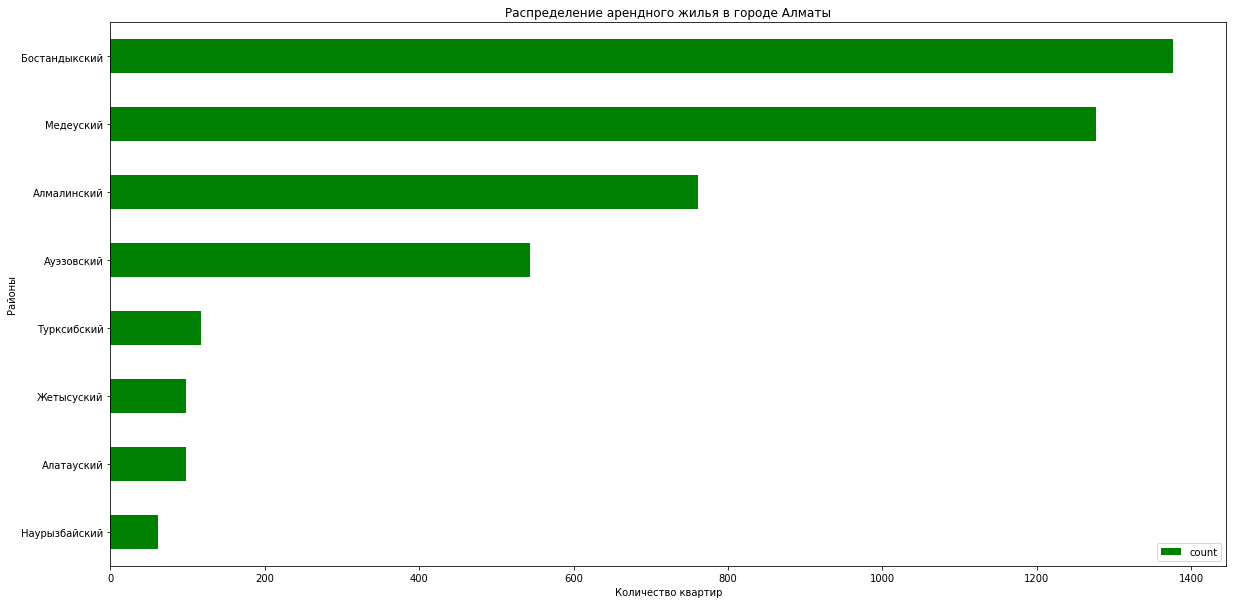

In [17]:
df1.plot(kind='barh', 
             stacked=False,
             figsize=(20, 10),
             color='g',
             label=df1['count']
             )

plt.title('Распределение арендного жилья в городе Алматы')
plt.xlabel('Количество квартир')
plt.ylabel('Районы')
plt.show()

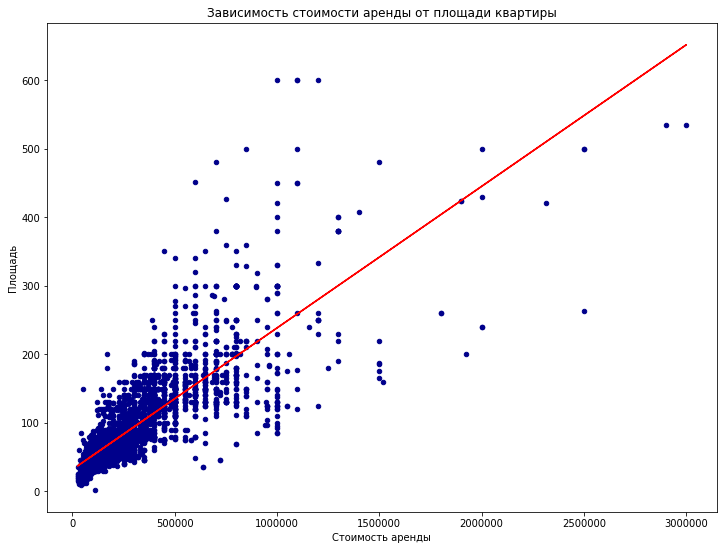

In [18]:
df.plot(kind='scatter', x='price', y='square', figsize=(12, 9), color='darkblue')

plt.title('Зависимость стоимости аренды от площади квартиры')
plt.xlabel('Стоимость аренды')
plt.ylabel('Площадь')

x = df['price']
y = df['square']
fit = np.polyfit(x, y, deg=1)
plt.plot(x, fit[0] * x + fit[1], color='red')

plt.show()

In [19]:
df2 = df.loc[df.price <= 200000]

In [20]:
df2.head()

,price,owner,specialist,rooms,square,district,year
1,130000,0,1,3,75.0,Ауэзовский,1993
2,80000,0,1,1,32.0,Алмалинский,1978
4,110000,0,1,1,45.0,Алмалинский,1985
5,165000,0,1,1,41.0,Медеуский,1990
7,175000,0,1,1,60.0,Алмалинский,1985


In [21]:
df2.shape

(2341, 7)

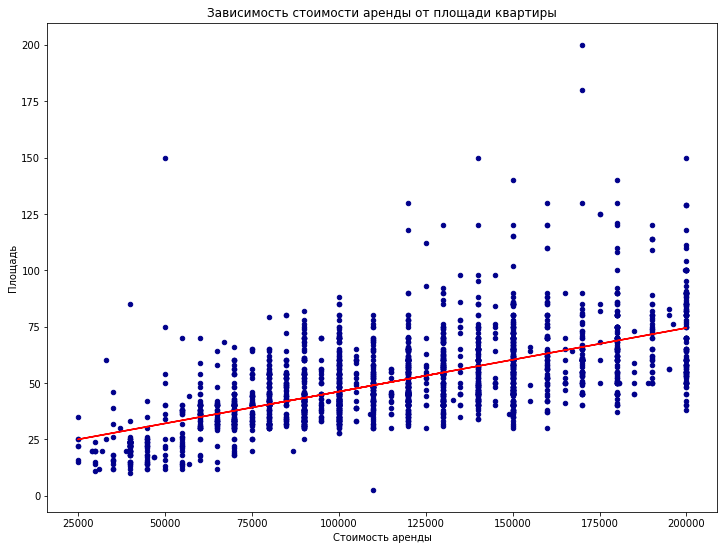

In [22]:
df2.plot(kind='scatter', x='price', y='square', figsize=(12, 9), color='darkblue')

plt.title('Зависимость стоимости аренды от площади квартиры')
plt.xlabel('Стоимость аренды')
plt.ylabel('Площадь')

x = df2['price']
y = df2['square']
fit = np.polyfit(x, y, deg=1)
plt.plot(x, fit[0] * x + fit[1], color='red')

plt.show()

In [26]:
df4 = df.groupby(['district']).sum()
#df4.sort_values(by=['count'], inplace=True)
df4

,price,owner,specialist,rooms,square
district,,,,,
Алатауский,8891888,56,42,162,5144.50
Алмалинский,162323396,222,539,1760,56764.66
Ауэзовский,58689443,158,385,979,27678.40
Бостандыкский,443548998,238,1139,3450,134778.10
Жетысуский,8274000,46,52,161,4933.81
Медеуский,500432883,208,1069,3650,147447.20
Наурызбайский,7445497,41,21,122,3898.00
Турксибский,9749000,55,62,203,5348.14


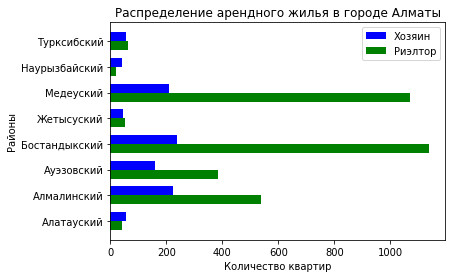

In [27]:
n_groups = 8

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35

rects1 = plt.barh(index + bar_width, df4['owner'], bar_width,
color='b',
label='Хозяин')

rects2 = plt.barh(index, df4['specialist'], bar_width,
color='g',
label='Риэлтор')

plt.ylabel('Районы')
plt.xlabel('Количество квартир')
plt.title('Распределение арендного жилья в городе Алматы')
plt.yticks(index + bar_width/2, df4.index)
plt.legend()

In [28]:
df.head()

,price,owner,specialist,rooms,square,district,year
0,400000,0,1,2,80.0,Медеуский,2014
1,130000,0,1,3,75.0,Ауэзовский,1993
2,80000,0,1,1,32.0,Алмалинский,1978
3,250000,1,0,2,61.0,Бостандыкский,2018
4,110000,0,1,1,45.0,Алмалинский,1985


In [37]:
df5 = df.groupby(['rooms']).size().reset_index(name='count')
df5.sort_values(by=['count'], inplace=True)
df5.set_index('rooms', inplace=True)
df5

,count
rooms,
10,1
11,1
8,4
7,10
6,30
5,125
4,420
1,968
3,1363


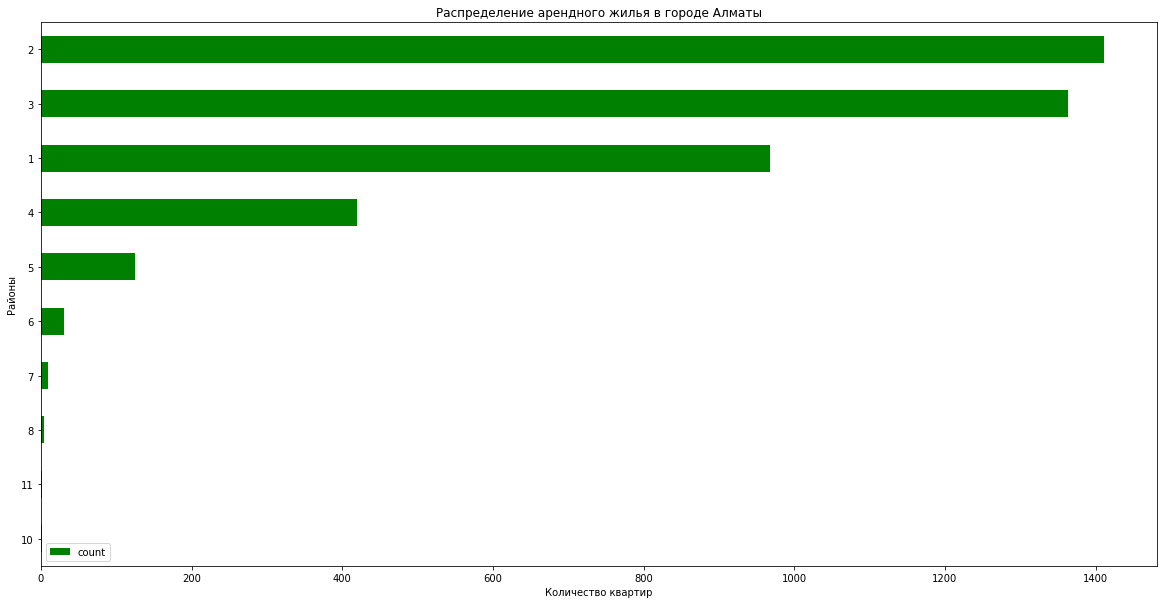

In [38]:
df5.plot(kind='barh', 
             stacked=False,
             figsize=(20, 10),
             color='g',
             label=df5['count']
             )

plt.title('Распределение арендного жилья в городе Алматы')
plt.xlabel('Количество квартир')
plt.ylabel('Районы')
plt.show()

In [54]:
df6 = df.groupby(['district','price']).size().reset_index(name='count')
df6.sort_values(by=['count'], inplace=True)
df6 = df6.pivot(index='price',columns='district',values='count')

In [55]:
df6

district,Алатауский,Алмалинский,Ауэзовский,Бостандыкский,Жетысуский,Медеуский,Наурызбайский,Турксибский
price,,,,,,,,
25000,3.0,NaN,1.0,NaN,NaN,1.0,1.0,1.0
29000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
29999,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
30000,2.0,NaN,NaN,NaN,2.0,NaN,2.0,NaN
31000,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
32000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
33000,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
35000,1.0,2.0,4.0,NaN,2.0,1.0,1.0,1.0
37000,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
